<a href="https://colab.research.google.com/github/DimaFrank/Mathematical_Programming/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Name: Dima Frank

Student Id: 327314308

### About the data.

*For this task I will use the data of earthquakes in Italy between 2016-08-24 and 2016-11-30.*

*The data is taken from kaggle:*

https://www.kaggle.com/datasets/blackecho/italy-earthquakes


*As it's know that the magnitude of earthquakes is power-law distributed relative to their frequency.*

*Or we can also say that the frequency of earthquakes varies inversely with their intensity.* 


**Meta data:**

The dataset contains events from 2016-08-24 to 2016-11-30. It's a single .csv file with the following header:

Time,Latitude,Longitude,Depth/Km,Magnitude
The dataset contains 8087 rows (8086 of data + 1 of header)


### Get data.

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
!wget --quiet --show-progress https://drive.google.com/drive/u/0/folders/1zKTXVP8ncsRRXgtFxA6MvL-lWirAoc6a

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/ColabDatasets/

Italy_Earthquakes		 Retail_Store_Sales_Transactions.zip
ItalyEarthquakes.zip		 rts22_test.csv
Retail_Store_Sales_Transactions  user-ct-test-collection-01.txt.gz


In [ ]:
!unzip /content/drive/MyDrive/ColabDatasets/ItalyEarthquakes.zip -d /content/drive/MyDrive/ColabDatasets/Italy_Earthquakes/  

Archive:  /content/drive/MyDrive/ColabDatasets/ItalyEarthquakes.zip
replace /content/drive/MyDrive/ColabDatasets/Italy_Earthquakes/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### Exploring the data.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ColabDatasets/Italy_Earthquakes/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv")
df.shape

(8086, 5)

In [5]:
df.head(5)

,Time,Latitude,Longitude,Depth/Km,Magnitude
0,2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
1,2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2,2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
3,2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
4,2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


***.תחילה נראה את ההתפגות של הנתונים על-ידי היסטוגרמה***


***.ניתן לראות שהעוצמה של רעידות אדמה ביחס לחשכיחותם מתפלגת דומה לחוק חזקה***

***לפחות 80 אחוז מהמדידות נמצאות מתחת ל-3 בסולם ריכטר ורק בערך 20 אחוז נמצאות מעל***

**בסך הכל בדאטה קיימות 8086 תצפיות (מדידות) בסקלה מ-2 עד 6.5**

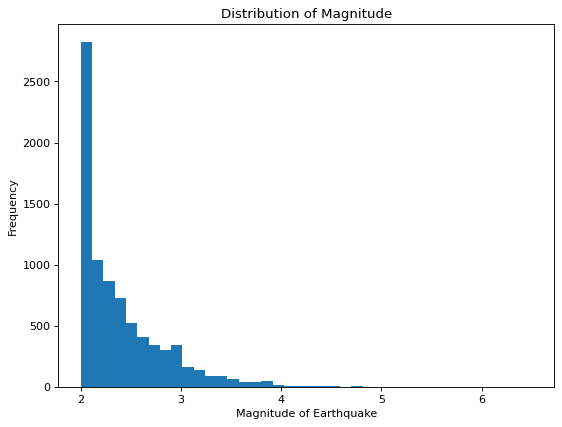

In [6]:
figure(figsize=(8, 6), dpi=80)
df['Magnitude'].plot(kind='hist', bins=40)
plt.title("Distribution of Magnitude")
plt.xlabel("Magnitude of Earthquake")
plt.ylabel("Frequency")
plt.show()

***מכיוון שהמדידות בסולם ריכטר הן לא משתנה רציף אלה משתנה בדיד, אני אקבץ את 
הדאטה לצורך הנוחות על ידי פונקציה של פייתון***

In [7]:
tmp = df['Magnitude'].value_counts()
aggregated_data = pd.DataFrame(tmp).reset_index().rename(columns={"index": "Magnitude", "Magnitude": "Freq"}) # דאטה מקובצת
# נראה את הנתנונים המקובצים
aggregated_data.head(10)

,Magnitude,Freq
0,2.0,1527
1,2.1,1299
2,2.2,1040
3,2.3,863
4,2.4,723
5,2.5,519
6,2.6,406
7,2.7,340
8,2.8,304
9,2.9,177


***נצייר את פונקצית ההתפלגות של הנתונים שלנו***


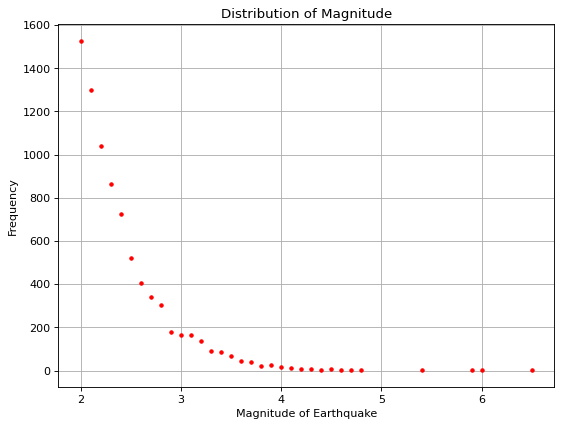

In [8]:
# Plot
figure(figsize=(8, 6), dpi=80)
plt.plot(aggregated_data['Magnitude'], aggregated_data['Freq'], 'r.')
plt.title("Distribution of Magnitude")
plt.xlabel("Magnitude of Earthquake")
plt.ylabel("Frequency")
plt.grid()
plt.show()

***Creating CDF for Actual data.***

***נראה איך נראת פונקצית צפיפות המצטברת של הנתונים שלנו***

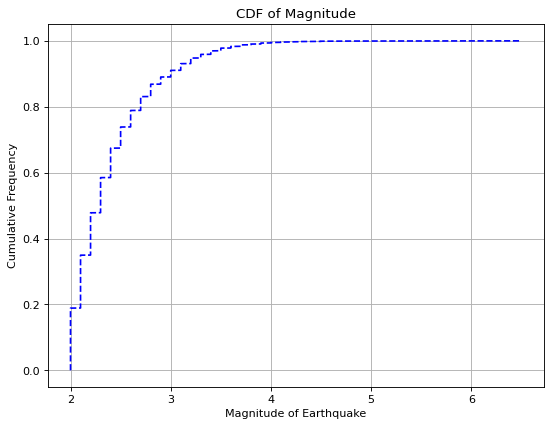

In [9]:
x = np.sort(df['Magnitude'])
y = np.arange(1, len(x)+1)  / len(x)

# Plot
figure(figsize=(8, 6), dpi=80)
plt.plot(x,y,'b--')
plt.title("CDF of Magnitude")
plt.xlabel("Magnitude of Earthquake")
plt.ylabel("Cumulative Frequency")
plt.grid()
plt.show()

In [10]:
data=aggregated_data.copy()
data = data.sort_values(by=['Magnitude'])
data['Cumulative Freq'] = data['Freq'].cumsum()  # שכיחות המצתברת
data['CDF'] = data['Cumulative Freq'] / data['Freq'].sum()  
data['CCDF'] = 1 - data['CDF']
data.head(5)

,Magnitude,Freq,Cumulative Freq,CDF,CCDF
0,2.0,1527,1527,0.188845,0.811155
1,2.1,1299,2826,0.349493,0.650507
2,2.2,1040,3866,0.478110,0.521890
3,2.3,863,4729,0.584838,0.415162
4,2.4,723,5452,0.674252,0.325748


***.בעזרת רגרסיה לינארית נמצא קו ישר לזנב של ההתפלגות***

***.ניקח את ערכי האיקס מעל 3.4 על מנת להתאים את הקו***

In [11]:
X = np.array(data[data['Magnitude']>3.4]['Magnitude']).reshape(-1,1)
y = np.array(data[data['Magnitude']>3.4]['CCDF']).reshape(-1,1)
reg = LinearRegression().fit(X, y)
slope = reg.coef_[0][0]
intercept = reg.intercept_[0]
print('The line: y = {intercept} + {coef}*X'.format(intercept=round(intercept,2), coef=round(slope,3)))

The line: y = 0.03 + -0.005*X


***.בניית פונקציית קו ישר שמצאנו***

In [12]:
linef = lambda x: intercept + slope*x 

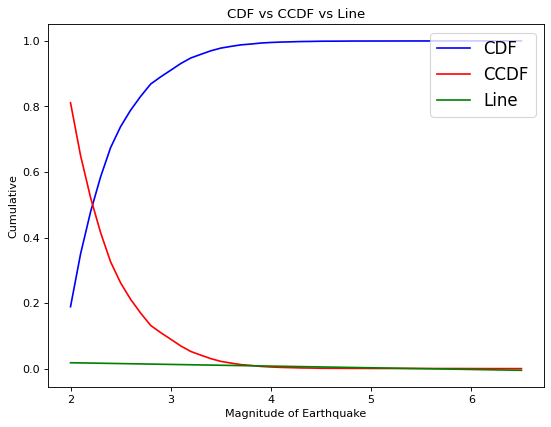

In [14]:
figure(figsize=(8, 6), dpi=80)
plt.plot(data['Magnitude'], data['CDF'], 'b-', label='CDF')
plt.plot(data['Magnitude'], data['CCDF'], 'r-', label='CCDF')
plt.plot(data['Magnitude'], linef(data['Magnitude']), 'g-', label='Line')
plt.title("CDF vs CCDF vs Line")
plt.xlabel("Magnitude of Earthquake")
plt.ylabel("Cumulative")
plt.legend(loc=1, prop={'size':15})
plt.show()

במאמר שנקראה 

"Power-law distributions in empirical data"

על-ידי 

Aaron Clauset & Cosma Rohilla Shalizi & M. E. J. Newman§

הם מציעים שיטה למציאת

Xmin

על-ידי בניית מודל שמתאר את הדאטה בצורה הכי טובה, בשיטה של ריבועים פחותים, וממזארת את הציון של קולמוגורוב-סמירנוב בין פונקציית צפיפות המצטברת האמיתית (של הדאטה) לבין פונקציית צפיפות המצטברת של המודל

**:מתודולוגיה**
<ol>
    <li>(non-linear least squares) נבנה מודל שמתאר את הדאטה בצורה הכי טובה על-ידי שיטה של הריבועים הפחותים</li> 
    <li>ניצור איתו דאטה aX^b אחרי שנמצא מודל מהצורה</li>
    <li>ניצור את פונקציית צפיפות המצטברת גם לדאטה האמיתי וגם לדאטה שייצרנו על ידי המודל</li>
    <li>על מנת למנוע איטרציות מיותרות Xmin נאכלס את הניחוש הראשוני של </li>
    <li>ומחזירה את הציון קולמוגורוב-סמירנוב Xmin נבנה פונקציה שמקבלת את </li>
    <li>ננסה למצוע את המינימום של הפונקציה זו על ידי אופטימיזציה</li>
</ol>

***Building a model that best fits the data.***

In [16]:
# a * x**b

X = aggregated_data['Magnitude']
y = aggregated_data['Freq']
lnX = np.log(X)
lnY = np.log(y)
b, lna = np.polyfit(lnX, lnY, 1) # Minimizes the squared error
a = np.exp(lna)
print('power={} sigma={}'.format(b,a))


power=-7.5627536424697235 sigma=509682.15101862804


***: מצאנו שהפולינום שמתאר את הדאטה הכי טוב הוא מהצורה הבא***

In [18]:
f = lambda x: 509682.15101862804 * (x**-7.5627536424697235)
t=aggregated_data['Magnitude']

***נצייר פונקציית הצפיפות של הדאטה האמיתית שלנו יחד עם פולינום שמצאנו***

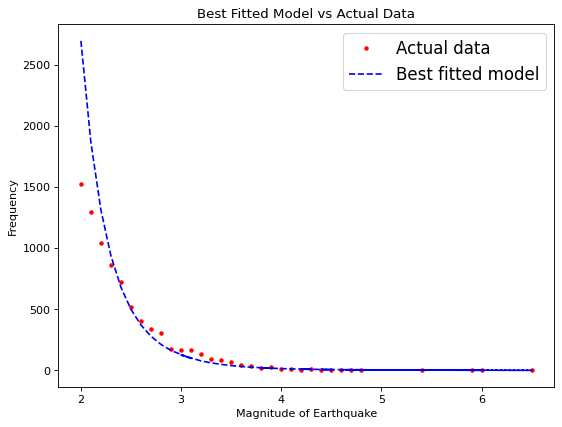

In [19]:
figure(figsize=(8, 6), dpi=80)
plt.plot(aggregated_data['Magnitude'], aggregated_data['Freq'], 'r.', label='Actual data')
plt.plot(aggregated_data['Magnitude'], f(t), 'b--', label='Best fitted model')
plt.title("Best Fitted Model vs Actual Data")
plt.xlabel("Magnitude of Earthquake")
plt.ylabel("Frequency")
plt.legend(loc=1, prop={'size':15})
plt.show()

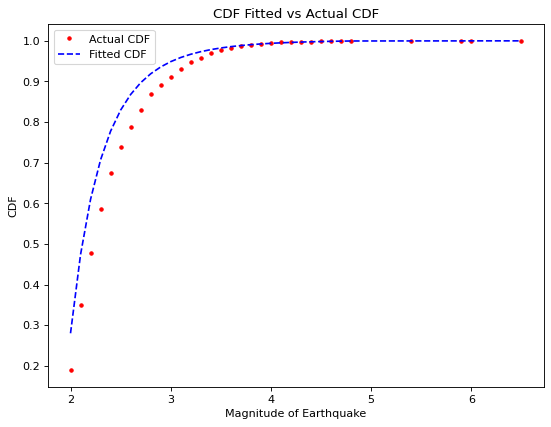

In [31]:
figure(figsize=(8, 6), dpi=80)

data['Fitted Model'] = f(data['Magnitude'])
data['Cumulative Model'] = data['Fitted Model'].cumsum()
data['CDF Fitted'] = data['Cumulative Model'] / data['Fitted Model'].sum()
data['delta'] = abs(data['CDF Fitted'] - data['CDF'])

plt.plot(data['Magnitude'], data['CDF'], 'r.', label='Actual CDF')
plt.plot(data['Magnitude'], data['CDF Fitted'], 'b--', label='Fitted CDF')
plt.title("CDF Fitted vs Actual CDF")
plt.xlabel("Magnitude of Earthquake")
plt.ylabel("CDF")
plt.legend(loc=2, prop={'size':10})
plt.show()

In [32]:
data.head(5)

,Magnitude,Freq,Cumulative Freq,CDF,CCDF,Fitted Model,Cumulative Model,CDF Fitted,delta
0,2.0,1527,1527,0.188845,0.811155,2695.775542,2695.775542,0.280032,0.091187
1,2.1,1299,2826,0.349493,0.650507,1863.950093,4559.725635,0.473656,0.124163
2,2.2,1040,3866,0.478110,0.521890,1311.115792,5870.841427,0.609852,0.131742
3,2.3,863,4729,0.584838,0.415162,936.787130,6807.628556,0.707164,0.122326
4,2.4,723,5452,0.674252,0.325748,678.977639,7486.606196,0.777695,0.103443


In [33]:
from scipy.stats import ksone

confidence_level = 0.95
alpha = 1 - confidence_level

D_stat = data['delta'].max()
D_critical = ksone.ppf(1-alpha/2, len(data))

print(D_stat)
print(D_critical)
print('There is no significant diffrenece between the distributions for the samples.')

0.13174177595552028
0.2307616992848535
There is no significant diffrenece between the distributions for the samples.


****Estimation of Xmin****

***:האלגוריתם***

נתחיל לרוץ על האיקסים מהניחוש הראשוני (שנגדיר בהמשך) ומעלה

בכל איטרציה של האלגוריתם נחשב את הציון של קולמוגורוב-סמירנוב בין פונקציות צפיפות המצתברת של הדאטה האמיתית ושל המודל שבנינו

בכל איטרציה נזיז את הניחוש הראשוני שלנו למעלה

בכך אנחנו מניחים בכל איטרציה שאיקס מינימום הוא שונה

נתעלם מכל ערכי איקס שמתחת לאיקס מינימום החשוד באיטרציה הנוכחית

נבנה פונקציה שמקבלת איקס החשוד להיות איקס מינימום
ומחזירה את הציון קולמוגורוב סמירנוב


נמצא את המינימום לפונקציה זו



In [35]:
data.head(5)

,Magnitude,Freq,Cumulative Freq,CDF,CCDF,Fitted Model,Cumulative Model,CDF Fitted,delta
0,2.0,1527,1527,0.188845,0.811155,2695.775542,2695.775542,0.280032,0.091187
1,2.1,1299,2826,0.349493,0.650507,1863.950093,4559.725635,0.473656,0.124163
2,2.2,1040,3866,0.478110,0.521890,1311.115792,5870.841427,0.609852,0.131742
3,2.3,863,4729,0.584838,0.415162,936.787130,6807.628556,0.707164,0.122326
4,2.4,723,5452,0.674252,0.325748,678.977639,7486.606196,0.777695,0.103443


In [42]:
estimation = aggregated_data.copy()
results = []
x_axes = []
D = []
range = [3,6,0.1] # נבדוק את האיקסים החשודים בלהיות איקס מינימום בטווח הזה בין 3 ל-6, בצעדים של 0.1 בסקלה של ריכטר

def KS_test_run(dataset, range):
     
     start = range[0]
     end = range[1]
     step= range[2]

     while start <= end:
        temp = dataset.copy().iloc[start:,:] 
        temp = temp.rename(columns={"Magnitude": "X"})
        temp = temp.rename(columns={"Freq": "y"})
        temp = temp.sort_values(by=['X'])
        temp['Fitted y'] = f(temp['X'])
        temp['Cumulative Y'] = temp['y'].cumsum() 
        temp['Cumulative Fitted Y'] = temp['Fitted y'].cumsum()
        temp['CDF Actual'] = temp['Cumulative Y'] / temp['y'].sum()
        temp['CDF Fitted'] = temp['Cumulative Fitted Y'] / temp['Fitted y'].sum()
        temp['delta'] = abs(temp['CDF Actual'] - temp['CDF Fitted'])
        x_axes.append(temp.iloc[0,0])
        results.append(temp['delta'].max())
        D.append(temp['delta'].max())
        print('i={}, X={}, D={}'.format(start,temp.iloc[0,0],temp['delta'].max()))
        start += step


KS_test_run(dataset=estimation, range=range)

i=3, X=2.3, D=0.066625805926808


TypeError: ignored

In [ ]:
D[18]

0.0935530434212869

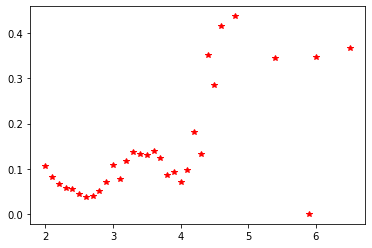

In [ ]:
plt.plot(aggregated_data['Magnitude'][:-1], D, 'r*')

In [ ]:
Xmin=3.9
n = len(test[test['Magnitude']>=Xmin])
alpha = 1 + n * (np.log(test[test['Magnitude']>Xmin]['Magnitude'] / Xmin).sum())**-1
alpha

6.088845220918981

In [48]:
# def CDF_actual(x):
#   if x < data['Magnitude'].min():
#      return 0.0
#   return float(data[data['Magnitude']<=x]['CDF'][-1:])

# def CDF_fitted(x):
#   if x < data['Magnitude'].min():
#      return 0.0
#   return float(data[data['Magnitude']<=x]['CDF Fitted'][-1:])

In [73]:
estimation = aggregated_data.copy()
results = []
x_axes = []
D = []
range = [3,4,0.1] # נבדוק את האיקסים החשודים בלהיות איקס מינימום בטווח הזה בין 3 ל-6, בצעדים של 0.1 בסקלה של ריכטר

def KS_test_run(dataset, range):

    start = range[0]
    end = range[1]
    step= range[2]

    while start <= end:
        tmp = data.copy()
        tmp = tmp.sort_values(by=['Magnitude'])
        tmp = tmp[tmp['Magnitude'] >= start]
        KS = tmp['delta'].max()
        D.append(KS)
        x=tmp['Magnitude'].iloc[0]
        x_axes.append(x)

        print('x={}  D={}'.format(x, KS))

        start += step




KS_test_run(dataset=estimation, range=range)

x=3.0  D=0.038483208133327285
x=3.1  D=0.028258233864229654
x=3.2  D=0.01932290294493222
x=3.4  D=0.008840867528199903
x=3.5  D=0.0046209752487043065
x=3.6  D=0.0027126405081251415
x=3.7  D=0.0011625401303662075
x=3.8  D=0.0011625401303662075
x=3.9  D=0.0011625401303662075
x=4.0  D=0.0011625401303662075


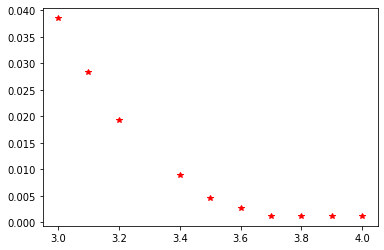

In [75]:
plt.plot(x_axes, D, 'r*')

In [72]:
min(D)

8.600361883503993e-05

In [68]:
data[10:20]

,Magnitude,Freq,Cumulative Freq,CDF,CCDF,Fitted Model,Cumulative Model,CDF Fitted,delta
11,3.0,163,7361,0.910339,0.089661,125.588224,9133.991633,0.948822,0.038483
10,3.1,165,7526,0.930744,0.069256,98.005847,9231.997480,0.959003,0.028258
12,3.2,137,7663,0.947687,0.052313,77.085836,9309.083316,0.967010,0.019323
13,3.3,90,7753,0.958818,0.041182,61.081014,9370.164330,0.973355,0.014538
14,3.4,87,7840,0.969577,0.030423,48.736609,9418.900939,0.978418,0.008841
15,3.5,67,7907,0.977863,0.022137,39.142345,9458.043284,0.982484,0.004621
16,3.6,42,7949,0.983057,0.016943,31.631564,9489.674847,0.985770,0.002713
17,3.7,38,7987,0.987757,0.012243,25.711639,9515.386487,0.988441,0.000684
19,3.8,20,8007,0.990230,0.009770,21.015461,9536.401947,0.990624,0.000394
18,3.9,25,8032,0.993322,0.006678,17.267259,9553.669207,0.992417,0.000904


In [ ]:
def KS_general(cdf1, cdf2, range=[data['Magnitude'].min(),data['Magnitude'].max(),0.1]):
  D= []
  X = []
  Diff=[]
  start=range[0]
  end=range[1]
  step=range[2]
  for i in np.arange(start,end,step):
     diff = abs(cdf2(i) - cdf1(i))
     D.append(diff) 
    #  print('X={} diff={}'.format(i,diff))
     X.append(i)
     Diff.append(diff)

  return X, Diff 




# KS_general(CDF_fitted, CDF_actual)

***Parameeters estimation check:***

In [ ]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import powerlaw
data = aggregated_data['Magnitude'] # data can be list or numpy array
results = powerlaw.Fit(data)
print('alpha = {}'.format(results.power_law.alpha))
print('Xmin = {}'.format(results.power_law.xmin))
R, p = results.distribution_compare('power_law', 'lognormal')

Calculating best minimal value for power law fit
alpha = 6.088845220918981
Xmin = 3.9


### Tests of Estimates for the Lower Bound

**Goodness of fit**

In [ ]:
p_law = lambda Xmin, alpha: Xmin * (1-np.random.uniform(0,1,1)[0])**(1/(1-alpha))

In [ ]:
def create_sintetic_data(size):
  Xmin=3.9
  alpha=6.088
  distribution = []
  for i in range(size):
    p = round(p_law(Xmin, alpha),1) 
    distribution.append(p)

  return distribution

In [ ]:
sintetic_data_catalog = [] # 1000 power-law distributed datasets of 5000 observations each

for i in range(1000):
  tmp = create_sintetic_data(5000)
  sintetic_data_catalog.append(tmp)

In [ ]:
import time 
KS_array = []

for i in range(len(sintetic_data_catalog)):

    t = pd.DataFrame(sintetic_data_catalog[i], columns=['magnitude'])
    tmp = pd.DataFrame(t['magnitude'].value_counts().reset_index().rename(columns={"index": "Magnitude", "magnitude": "Freq"})).sort_values('Magnitude')
    tmp['CDF'] = tmp['Freq'].cumsum() / tmp['Freq'].sum()

    X = tmp['Magnitude']
    y = tmp['Freq']
    lnX = np.log(X)
    lnY = np.log(y)
    b, lna = np.polyfit(lnX, lnY, 1) # Minimizes the squared error
    a = np.exp(lna)
    # print('power={} sigma={}'.format(b,a))

    fx = lambda x: a * x**b

    tmp['Model'] = fx(tmp['Magnitude'])
    tmp['CDF_model'] = tmp['Model'].cumsum() / tmp['Model'].sum()
    tmp['delta'] = abs(tmp['CDF'] - tmp['CDF_model'])
    KS = tmp['delta'].max()
    KS_array.append(KS)

    # plt.plot(tmp['Magnitude'], tmp['CDF'], 'r-')
    # plt.plot(tmp['Magnitude'], tmp['CDF_model'], 'b--')
    # plt.show()

    # time.sleep(2.4)



In [ ]:
Dn = D[18]
def find_pvalue():
  counter = 0
  for i in range(len(KS_array)):
    if KS_array[i]<Dn:
      counter+=1
  return counter/len(KS_array)

In [ ]:
print(find_pvalue())

0.588


In [ ]:
Dn

0.0935530434212869

In [ ]:
KS_array

[0.06923133281805283,
 0.10834445954201288,
 0.10118761928404052,
 0.05000627356369125,
 0.07369194914760524,
 0.11916235922268614,
 0.09834364715771893,
 0.050959907492200474,
 0.11059169155303794,
 0.0721630888070689,
 0.10348781811297514,
 0.050267228102619854,
 0.07873671955098005,
 0.08586191302020685,
 0.09061742951755591,
 0.09020686290686508,
 0.10538081003436883,
 0.07379175556888129,
 0.17987534698444652,
 0.05723488859804249,
 0.07011374366910728,
 0.14125344311378873,
 0.05032930197216823,
 0.11077715595009774,
 0.04186832027647164,
 0.08771672805351616,
 0.1003436936154668,
 0.0915932529638731,
 0.08057721832608267,
 0.07372907220864788,
 0.10191419610195596,
 0.13542653649575442,
 0.10572752427649124,
 0.08130819474668227,
 0.08736690617711562,
 0.07555128830549529,
 0.09162367916328751,
 0.09476474495472154,
 0.08105712479779581,
 0.0628305559693616,
 0.06899765186629103,
 0.06990105790913226,
 0.0779847451787018,
 0.04258605579231388,
 0.11636372301980147,
 0.0585666118

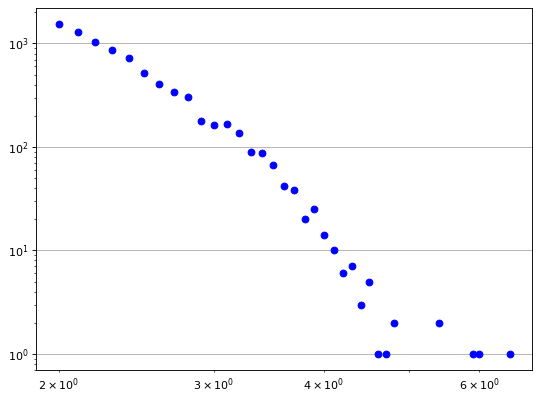

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.loglog(test['Magnitude'], test['Freq'], 'bo')
plt.grid()
plt.show()

In [ ]:
# !pip install powerlaw 

In [ ]:
# import powerlaw
# results = powerlaw.Fit(df['Magnitude'])
# print(results.power_law.alpha)
# print(results.power_law.xmin)
# R, p = results.distribution_compare('power_law', 'lognormal')

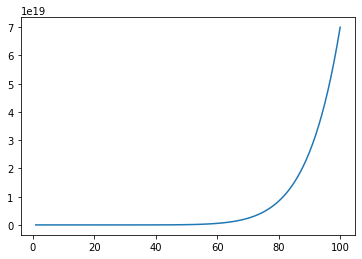

In [ ]:
# x = np.arange(1,101,1)
# f = lambda x: 7*(x**9.5)
# y = f(x)
# plt.plot(x,y)


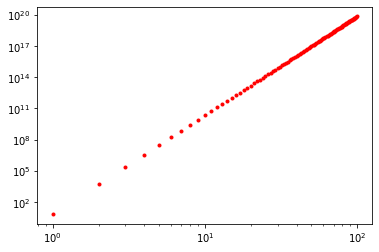

In [ ]:
plt.loglog(x,y, 'r.')

In [ ]:
# results = powerlaw.Fit(y)
# print(results.power_law.alpha)
# print(results.power_law.xmin)
# R, p = results.distribution_compare('power_law', 'lognormal')
# print('R:{}'.format(R))
# print('p:{}'.format(p))

Calculating best minimal value for power law fit
1.8609289253910957
7.456850004233502e+18
R:-4.147230883312865
p:0.09673379885194519
